In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [6]:
import nltk
import re

In [ ]:
# Reading the first review

In [65]:
review = df.iloc[0, 0]

In [66]:
review

'Wow... Loved this place.'

In [67]:
# Also can be done as

review1 = df['Review'][0]
review1

'Wow... Loved this place.'

# making it lower case

In [68]:
review = review.lower()

In [69]:
review

'wow... loved this place.'

In [71]:
# Just for reference

r2 = review
r2

'wow... loved this place.'

# Removing the punctuation marks from review using regex

In [72]:
review = re.sub('[^a-zA-Z]', ' ', review)

In [73]:
review

'wow    loved this place '

In [74]:
# without using regex..    # NOT WORKING BUT SHOULD WORK !

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
'wow... loved this place.'.strip(string.punctuation)

'wow... loved this place'

# Working on the stopwords

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
from nltk.corpus import stopwords

In [78]:
stop_words = stopwords.words('english')

In [79]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [64]:
# Removing the stop words from string

In [57]:
review = review.split()

In [58]:
review

['wow', 'loved', 'this', 'place']

In [59]:
review = [word for word in review if word not in stop_words]

In [60]:
review

['wow', 'loved', 'place']

# Stemming

In [62]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [63]:
ps.stem('Loved')

'love'

# applying both stop words and stemming 

In [80]:
review

'wow    loved this place '

In [81]:
review = review.split()

In [82]:
review = [ ps.stem(word) for word in review if word not in stop_words ]

In [83]:
review

['wow', 'love', 'place']

In [84]:
review = ' '.join(review)

In [85]:
review

'wow love place'

# Applying these technique on all reviews from dataframe

In [86]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [92]:
def data_clean(s):
    s = s.lower()
    s = re.sub('[^a-zA-Z]', ' ', s)
    s = s.split()
    s = [ ps.stem(word) for word in s if word not in stop_words ]
    return ' '.join(s)

In [93]:
data_clean('Not tasty and the texture was just nasty.')

'tasti textur nasti'

In [99]:
master_list = []

In [100]:
for i in range(len(df)):
    master_list.append(data_clean(df['Review'][i]))

In [101]:
master_list

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [102]:
# Another way

# l = []
# for r in df['Review']:
#     r = r.lower()
#     r = re.sub('[^a-z0-9]+',' ', r)
#     res_words = []
#     res_words = [ps.stem(word) for word in r.split() if word not in stop_words]
#     r = ' '.join(res_words)
#     l.append(r)

# Sparse matrix

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
cv = CountVectorizer()

In [133]:
# fit_transform here takes a functions of list

X = cv.fit_transform(master_list).toarray()

In [134]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [135]:
X.shape

(1000, 1565)

In [136]:
import numpy as np

In [137]:
Y = np.array(df['Liked'])

In [138]:
Y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [141]:
X_train.shape

(700, 1565)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [143]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [144]:
Y_pred = knn.predict(X_test)

In [145]:
error_rate = []
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    # Checking the mean of error where pred is not matching the actuals. Higher the mean => higher the error rate
    # ( Here mean will count all Trues as 1 and all false as 0)
    error_rate_for_K = np.mean(Y_pred != Y_test)
    
    error_rate.append(error_rate_for_K)
    
print(error_rate)

[0.38, 0.37333333333333335, 0.38666666666666666, 0.38333333333333336, 0.3933333333333333, 0.38333333333333336, 0.37, 0.37666666666666665, 0.39, 0.39, 0.39, 0.3433333333333333, 0.38333333333333336, 0.38666666666666666, 0.37, 0.3466666666666667, 0.38666666666666666, 0.38666666666666666, 0.36, 0.3933333333333333, 0.38666666666666666, 0.37666666666666665, 0.37, 0.3566666666666667, 0.39, 0.3333333333333333, 0.36333333333333334, 0.3233333333333333, 0.33666666666666667, 0.2966666666666667, 0.35, 0.3, 0.31666666666666665, 0.3333333333333333, 0.3233333333333333, 0.3433333333333333, 0.3466666666666667, 0.32666666666666666, 0.36666666666666664, 0.3433333333333333]


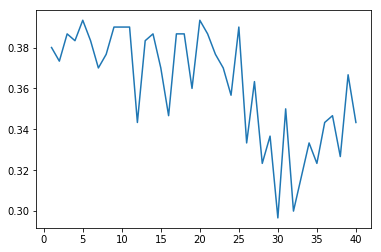

In [146]:
import matplotlib.pyplot as plt
plt.plot(range(1,41), error_rate)

In [147]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[109,  46],
       [ 43, 102]], dtype=int64)

In [149]:
(109 + 102) / (109+46+43+102)

0.7033333333333334

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [116]:
X_pca.shape

(1000, 2)

In [119]:
import matplotlib.pyplot as plt

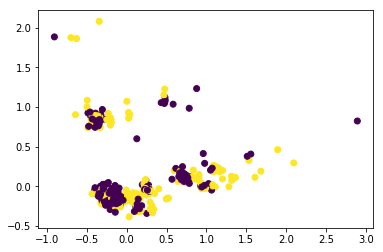

In [120]:
plt.scatter(X_pca[ : , 0], X_pca[ : , 1], c=df['Liked'])

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.3)

In [122]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [123]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [124]:
Y_pred = model.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_pred, Y_test)

array([[87, 54],
       [62, 97]], dtype=int64)

In [131]:
(87+97)/(87+54+62+97)

0.6133333333333333

In [126]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [127]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
Y_pred = model.predict(X_test)

In [129]:
confusion_matrix(Y_pred, Y_test)

array([[107, 101],
       [ 42,  50]], dtype=int64)

In [132]:
(107+50)/(107+101+42+50)

0.5233333333333333